In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
data.drop(columns='CustomerID',axis=1,inplace=True)

In [10]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [11]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
clean_data = pd.get_dummies(data,columns=['Gender'])
clean_data['Gender_Female'] = clean_data['Gender_Female'].replace(True,1)
clean_data['Gender_Female'] = clean_data['Gender_Female'].replace(False,0)
clean_data['Gender_Male'] = clean_data['Gender_Male'].replace(False,0)
clean_data['Gender_Male'] = clean_data['Gender_Male'].replace(True,1)
clean_data.head()

/tmp/ipykernel_6421/1307204209.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_data['Gender_Female'] = clean_data['Gender_Female'].replace(False,0)
/tmp/ipykernel_6421/1307204209.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_data['Gender_Male'] = clean_data['Gender_Male'].replace(True,1)


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [13]:
features = clean_data.columns
features

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

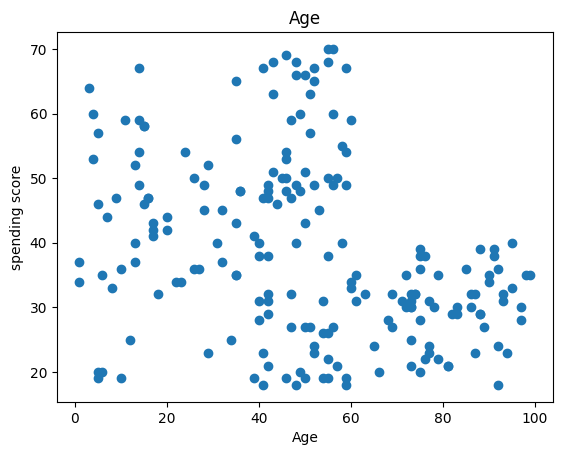

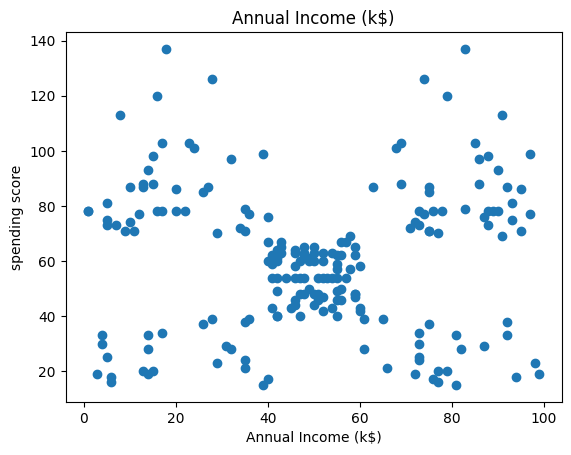

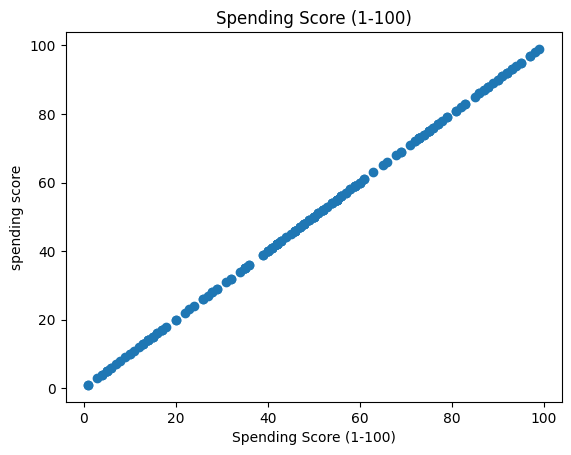

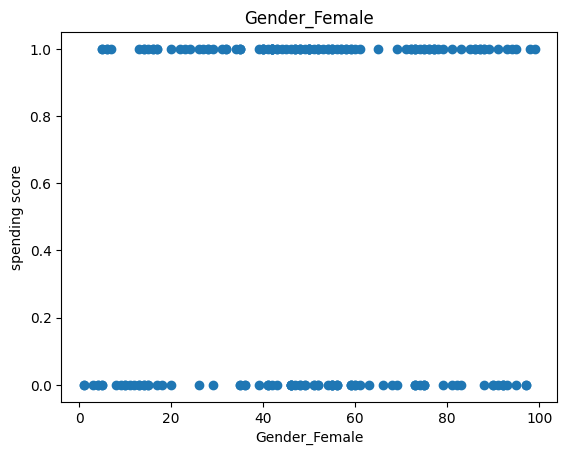

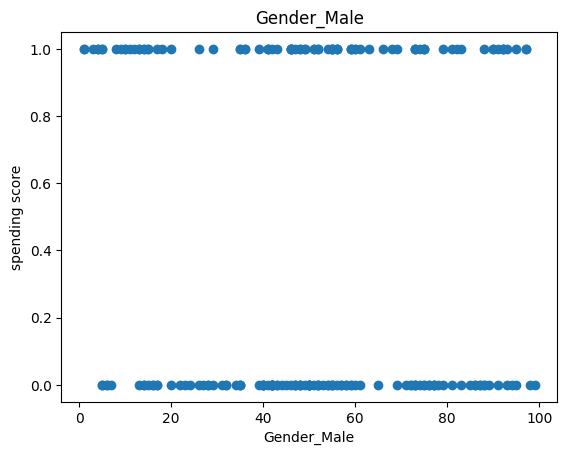

In [14]:
for i in features:
    plt.scatter(clean_data['Spending Score (1-100)'],clean_data[i])
    plt.title(i)
    plt.ylabel('spending score')
    plt.xlabel(i)
    plt.show() 

In [20]:
from sklearn.model_selection import train_test_split


X_train,X_test = train_test_split(clean_data,train_size=0.7,random_state=3)

In [44]:
from sklearn.cluster import KMeans

clusters = 5
kmeans = KMeans(n_clusters=clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_train)

In [47]:
kmeans.cluster_centers_

array([[25.22222222, 29.05555556, 76.83333333,  0.66666667,  0.33333333],
       [44.2037037 , 55.24074074, 49.16666667,  0.61111111,  0.38888889],
       [40.26923077, 87.57692308, 19.96153846,  0.57692308,  0.42307692],
       [44.6       , 26.13333333, 21.86666667,  0.53333333,  0.46666667],
       [33.11111111, 86.77777778, 81.33333333,  0.48148148,  0.51851852]])

In [48]:
fitting = kmeans.labels_

In [49]:
y_pred = kmeans.predict(X_test)

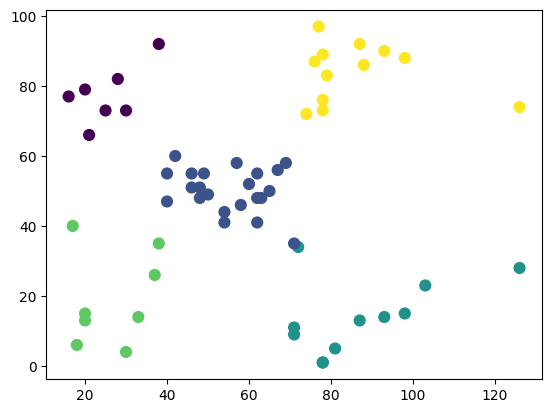

In [50]:

plt.scatter(X_test[features[1]],X_test[features[2]], c = y_pred, cmap='viridis', s=60)
plt.show()

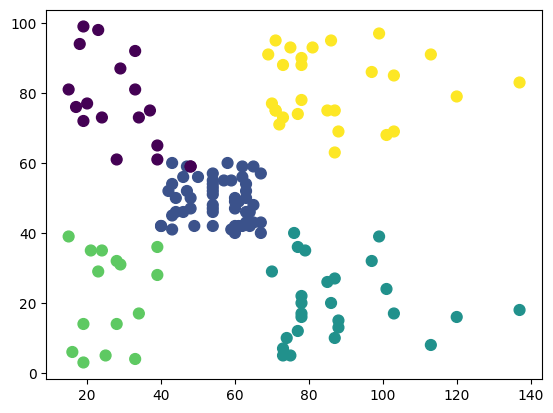

In [52]:

plt.scatter(X_train[features[1]],X_train[features[2]], c = fitting, cmap='viridis', s=60)
plt.show()